<a href="https://colab.research.google.com/github/skywalker290/Misleading-Video-Detection-Model/blob/main/Final_Results_%26_Conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


# Statistics About Datasets

In [ ]:
fvc = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_FVC.csv')
mvd = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_MVD.csv')
bolly = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_BollyBAIT.csv')
combined = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Updated_Combined.csv')


## Dataset Attrubutes

In [ ]:
print("FVC:            :",list(fvc.columns))
print("MVD:            :",list(mvd.columns))
print("Bolly Bait      :",list(bolly.columns))
print("Combined Dataset:",list(combined.columns))

FVC:            : ['video_id', 'LABEL', 'title', 'description', 'likes', 'comments', 'views']
MVD:            : ['video_id', 'Category', 'LABEL', 'title', 'description', 'likes', 'comments', 'views']
Bolly Bait      : ['video_id', 'LABEL', 'title', 'description', 'likes', 'comments', 'views']
Combined Dataset: ['video_id', 'LABEL', 'title', 'description', 'likes', 'comments', 'views']


## Fake & Real Frequency Visulisation

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a list of dataframes
df_list = [fvc, mvd, bolly, combined]
df_names = ['FVC', 'MVD', 'BollyBait', 'Combined']

# Define colors for the bars
color_dict = {"FAKE": "red", "REAL": "green"}

# Create subplots in a 2x2 panel
fig = make_subplots(rows=2, cols=2, subplot_titles=df_names)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loop through each dataframe and plot the histogram
for i, df in enumerate(df_list, start=1):
    # Sort the data by label
    df = df.sort_values(by="LABEL", ascending=True)

    # Count the occurrences of each label
    label_counts = df['LABEL'].value_counts()

    # Create the histogram trace
    trace = go.Bar(
        x=label_counts.index,
        y=label_counts.values,
        marker=dict(color=[color_dict[label] for label in label_counts.index]),
        name='Label',
        showlegend=False
    )

    # Add the trace to the subplot
    fig.add_trace(trace, row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)

    # Update subplot title and axis labels
    fig.update_xaxes(title_text="Label", row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)
    fig.update_yaxes(title_text="Count", row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)
    fig.update_layout(title_text=f"Histogram of Label in {df_names[i - 1]}", title_font_size=16)

# Update layout
fig.update_layout(height=600, width=800, showlegend=False)

# Show the plot
fig.show()


## Mean Value Analysis On Datasets

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define your dataframes
df_list = [fvc, mvd, bolly, combined]
df_names = ['FVC', 'MVD', 'BollyBait', 'Combined']

# Define colors for the bars
colors = ['green', 'red']

# Define labels for the bars
labels = ['Real', 'Fake']

# Define metrics
metrics = ['likes', 'comments', 'views']

# Create subplots in a 2x2 panel
fig = make_subplots(rows=2, cols=2, subplot_titles=df_names)

# Plotting bar graphs for each dataframe
for i, (df, name) in enumerate(zip(df_list, df_names), start=1):
    # Filter the dataframe for 'FAKE' and 'REAL' labels separately
    fake_data = df[df['LABEL'] == 'FAKE']
    real_data = df[df['LABEL'] == 'REAL']

    # Calculate the mean of 'likes', 'comments', and 'views' for both fake and real data
    fake_means = fake_data[['likes', 'comments', 'views']].mean()
    real_means = real_data[['likes', 'comments', 'views']].mean()

    # Adding bar traces for real data
    fig.add_trace(go.Bar(
        x=metrics,
        y=real_means.values,
        name='Real',
        marker_color=colors[0],
        legendgroup='Real',
        showlegend=(i == 1)  # Show legend only for the first subplot
    ), row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)

    # Adding bar traces for fake data
    fig.add_trace(go.Bar(
        x=metrics,
        y=fake_means.values,
        name='Fake',
        marker_color=colors[1],
        legendgroup='Fake',
        showlegend=False
    ), row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)

# Update layout
fig.update_layout(
    title='Mean Values for Real and Fake Videos',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Mean'),
    barmode='group'
)

# Show the plot
fig.show()


# Analysis Visualisation

In [ ]:
final = pd.read_csv('https://raw.githubusercontent.com/skywalker290/Misleading-Video-Detection-Model/main/Datasets/Final_Dataset.csv')
final

,video_id,title,description,likes,comments,views,sadness,love,surprise,fear,...,title_comments,title_Audio-text,description_comments,description_Audio-text,comments_Audio-text,likes_per_view_duration,subscriber,duration,LABEL,view-to-like
0,rxTuq8gymc0,Dharmendra Death,Dharmendra won the Filmfare magazine's new tal...,67,12,20230,0.022162,0.013866,0.000953,0.314072,...,0.000000,0.000000,0.004276,0.000000,0.000000,7.084635e-08,1.630000e+03,46747.826923,FAKE,301.940299
1,4N3hPrJLbEw,Abhishek Bachchan and Shweta Bachchan in Koffe...,"IBC24, Abhishek Bachchan and Shweta Bachchan i...",1548,95,499773,0.283611,0.649507,0.003379,0.058257,...,0.144783,0.136290,0.066167,0.020945,0.060903,6.673284e-08,5.150000e+06,46415.022799,FAKE,322.850775
2,CfvUr6WAEWM,How To Get 6 Pack Abs In One Day,Follow this simple workout and you can have ri...,4715,1095,797613,0.704599,0.009630,0.001151,0.279393,...,0.256142,0.272282,0.210820,0.233658,0.296522,5.508365e-08,2.080000e+03,107316.565897,FAKE,169.165005
3,i1rlytoxQ1o,Dark Secrets of Bachchan Family,Dirty Secrets of the Bachchan Family. Do you k...,22494,1603,6107009,0.010929,0.043082,0.001876,0.941048,...,0.184961,0.332750,0.288538,0.709499,0.291651,9.392691e-08,1.340000e+06,39214.626754,FAKE,271.495021
4,jkytlp91onQ,10 Secret Wife of Bollywood Actors,These are the Secret Wife of Bollywood Stars :...,583,7,58117,0.001231,0.002220,0.991610,0.003397,...,0.032911,0.192147,0.079762,0.620634,0.061056,2.672116e-07,1.340000e+06,37541.370110,FAKE,99.686106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,MBrAY6GgU5k,Nanhi Si Jaan | 2.0 (Hindi) | Rajinikanth | Ak...,Presenting the Official Video Song of 'Nanhi S...,150898,7274,6628331,0.195697,0.241472,0.539625,0.018206,...,0.146706,0.000000,0.134304,0.000000,0.000000,4.793062e-07,4.687867e+07,47497.009352,REAL,43.925904
1693,owPuQjInzO8,2.0 - Official Teaser [Hindi] | Rajinikanth | ...,Proudly presenting the Official Teaser of our ...,933225,81262,74712698,0.039626,0.663968,0.012226,0.244335,...,0.102089,0.000000,0.202550,0.000000,0.000885,2.521084e-07,4.687867e+07,49545.554415,REAL,80.058612
1694,Es2bli0uSYY,Madhuri's Bucket List - Part 1 | Hindi,Ever wondered what would be on the legendary M...,283,19,28300,0.001517,0.965794,0.030351,0.000529,...,0.127360,0.000000,0.055164,0.016542,0.040819,1.921851e-07,4.687867e+07,52033.183343,REAL,100.000000
1695,FgHKdoYpGpI,Watan ke aage kuch nahi | Raazi | Alia Bhatt |...,"For Sehmat, country is always first.\r\n\r\nRa...",550,9,69969,0.000410,0.998046,0.000372,0.000213,...,0.028917,0.000000,0.000000,0.000000,0.000000,1.494903e-07,4.687867e+07,52582.824774,REAL,127.216364


In [ ]:
for i in final:
  print(i)

video_id
title
description
likes
comments
views
sadness
love
surprise
fear
anger
joy
sadness_title
love_title
surprise_title
fear_title
anger_title
joy_title
title_description
title_comments
title_Audio-text
description_comments
description_Audio-text
comments_Audio-text
likes_per_view_duration
subscriber
duration
LABEL
view-to-like


## Approach Vise Attribute Distribution

In [ ]:
coorelation = [
    "title_description",
    "title_comments",
    "title_Audio-text",
    "description_comments",
    "description_Audio-text",
    "comments_Audio-text"
]

title_emotions = [
    "sadness_title",
    "love_title",
    "surprise_title",
    "fear_title",
    "anger_title",
    "joy_title"
]

comments_emotions = [
    "sadness",
    "love",
    "surprise",
    "fear",
    "anger",
    "joy"
]

statistics = [
    "likes",
    "comments",
    "views",
    "likes_per_view_duration",
    "subscriber",
    "duration",
    "view-to-like"
]

usual = [
    "video_id",
    "LABEL"
]







len(statistics+comments_emotions+title_emotions+coorelation)

25

## Coorelation Analysis:

In [ ]:
corr = final[usual+coorelation]
corr

,video_id,LABEL,title_description,title_comments,title_Audio-text,description_comments,description_Audio-text,comments_Audio-text
0,rxTuq8gymc0,FAKE,0.125488,0.000000,0.000000,0.004276,0.000000,0.000000
1,4N3hPrJLbEw,FAKE,0.128821,0.144783,0.136290,0.066167,0.020945,0.060903
2,CfvUr6WAEWM,FAKE,0.262421,0.256142,0.272282,0.210820,0.233658,0.296522
3,i1rlytoxQ1o,FAKE,0.257255,0.184961,0.332750,0.288538,0.709499,0.291651
4,jkytlp91onQ,FAKE,0.197109,0.032911,0.192147,0.079762,0.620634,0.061056
...,...,...,...,...,...,...,...,...
1692,MBrAY6GgU5k,REAL,0.171007,0.146706,0.000000,0.134304,0.000000,0.000000
1693,owPuQjInzO8,REAL,0.217295,0.102089,0.000000,0.202550,0.000000,0.000885
1694,Es2bli0uSYY,REAL,0.104290,0.127360,0.000000,0.055164,0.016542,0.040819
1695,FgHKdoYpGpI,REAL,0.110438,0.028917,0.000000,0.000000,0.000000,0.000000


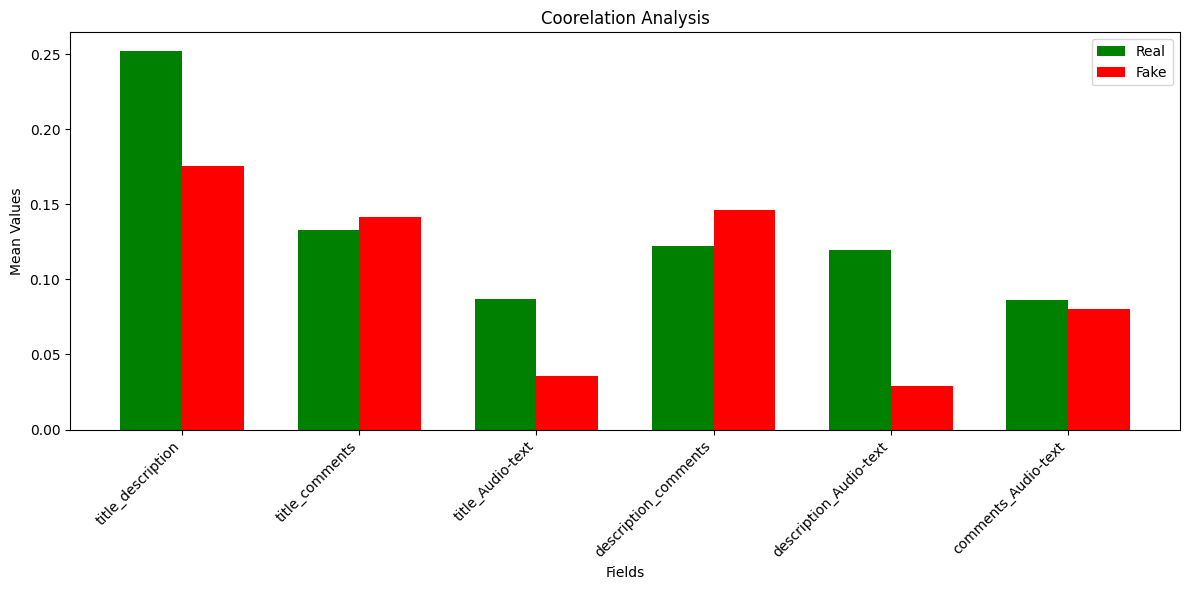

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the specified fields
data = corr
# Calculate mean values for 'REAL' and 'FAKE' labels
real_means = data[data['LABEL'] == 'REAL'][coorelation].mean()
fake_means = data[data['LABEL'] == 'FAKE'][coorelation].mean()



# Arrange the fields in the desired order
fields = [
    'title_description',
    'title_comments',
    'title_Audio-text',
    'description_comments',
    'description_Audio-text',
    'comments_Audio-text'
]

# Plotting bar graphs
fig, ax = plt.subplots(figsize=(12, 6))

# Width of each bar
bar_width = 0.35

# Positions for the bars
index = range(len(fields))

# Plotting bars for REAL labels
ax.bar(index, fake_means[fields], bar_width, color='green', label='Real')

# Plotting bars for FAKE labels with an offset
ax.bar([i + bar_width for i in index], real_means[fields], bar_width, color='red', label='Fake')

# Setting labels, title, and legend
ax.set_xlabel('Fields')
ax.set_ylabel('Mean Values')
ax.set_title('Coorelation Analysis')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(fields, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Title Emotion Analysis

In [ ]:
title_emo = final[usual+title_emotions]
title_emo

,video_id,LABEL,sadness_title,love_title,surprise_title,fear_title,anger_title,joy_title
0,rxTuq8gymc0,FAKE,0.894660,0.019278,0.003080,0.050899,0.028523,0.003560
1,4N3hPrJLbEw,FAKE,0.034586,0.513135,0.016501,0.345987,0.084462,0.005329
2,CfvUr6WAEWM,FAKE,0.008279,0.956747,0.001635,0.024458,0.007965,0.000916
3,i1rlytoxQ1o,FAKE,0.009239,0.009637,0.004265,0.393915,0.580104,0.002840
4,jkytlp91onQ,FAKE,0.010545,0.053717,0.005793,0.683511,0.241989,0.004445
...,...,...,...,...,...,...,...,...
1692,MBrAY6GgU5k,REAL,0.058886,0.651083,0.017052,0.214241,0.051810,0.006929
1693,owPuQjInzO8,REAL,0.021906,0.763621,0.007038,0.151959,0.051246,0.004230
1694,Es2bli0uSYY,REAL,0.034881,0.127859,0.003233,0.806132,0.025404,0.002490
1695,FgHKdoYpGpI,REAL,0.064055,0.814227,0.009391,0.041829,0.066156,0.004341


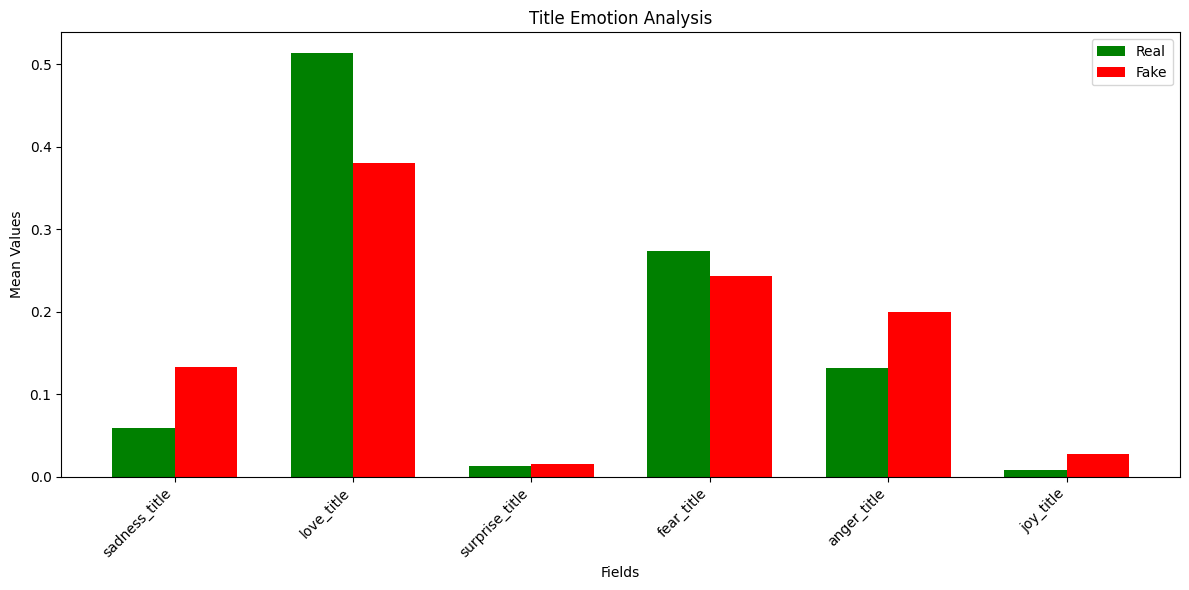

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the specified fields
data = title_emo
# Calculate mean values for 'REAL' and 'FAKE' labels
real_means = data[data['LABEL'] == 'REAL'][title_emotions].mean()
fake_means = data[data['LABEL'] == 'FAKE'][title_emotions].mean()



# Arrange the fields in the desired order
fields = title_emotions

# Plotting bar graphs
fig, ax = plt.subplots(figsize=(12, 6))

# Width of each bar
bar_width = 0.35

# Positions for the bars
index = range(len(fields))

# Plotting bars for REAL labels
ax.bar(index, real_means[fields], bar_width, color='green', label='Real')

# Plotting bars for FAKE labels with an offset
ax.bar([i + bar_width for i in index], fake_means[fields], bar_width, color='red', label='Fake')

# Setting labels, title, and legend
ax.set_xlabel('Fields')
ax.set_ylabel('Mean Values')
ax.set_title('Title Emotion Analysis')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(fields, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Comments Emotion Analysis:


In [ ]:
comments_emo = final[usual+comments_emotions]

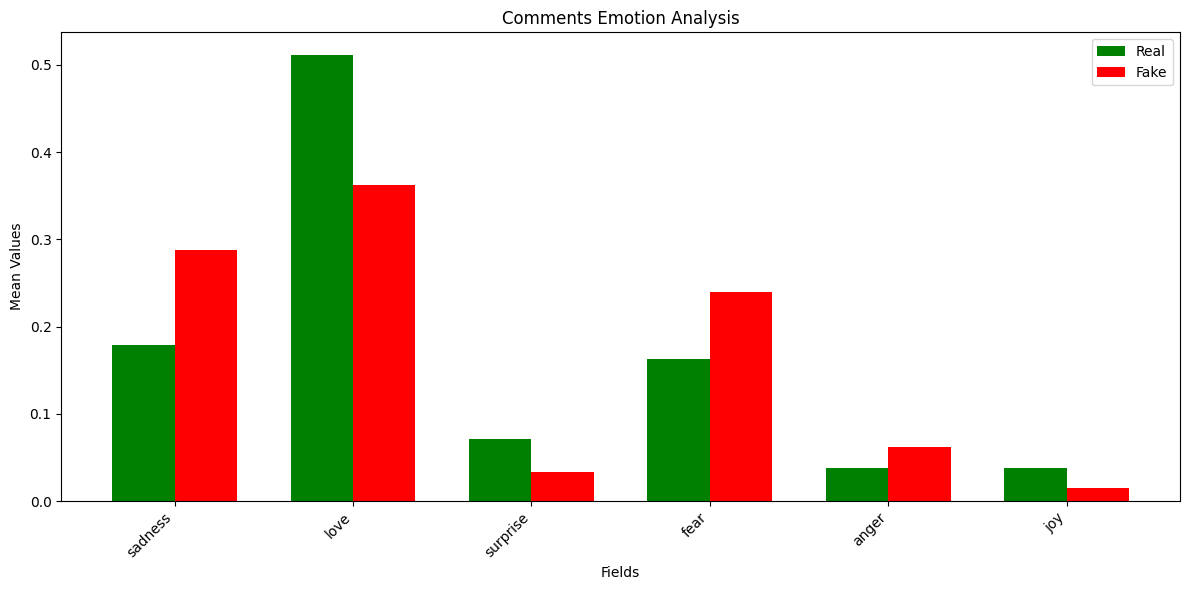

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the specified fields
data = comments_emo
# Calculate mean values for 'REAL' and 'FAKE' labels
real_means = data[data['LABEL'] == 'REAL'][comments_emotions].mean()
fake_means = data[data['LABEL'] == 'FAKE'][comments_emotions].mean()

# Arrange the fields in the desired order
fields = comments_emotions

# Plotting bar graphs
fig, ax = plt.subplots(figsize=(12, 6))

# Width of each bar
bar_width = 0.35

# Positions for the bars
index = range(len(fields))

# Plotting bars for REAL labels
ax.bar(index, real_means[fields], bar_width, color='green', label='Real')

# Plotting bars for FAKE labels with an offset
ax.bar([i + bar_width for i in index], fake_means[fields], bar_width, color='red', label='Fake')

# Setting labels, title, and legend
ax.set_xlabel('Fields')
ax.set_ylabel('Mean Values')
ax.set_title('Comments Emotion Analysis')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(fields, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Satistical Analysis

In [ ]:
stats = final[usual + statistics]

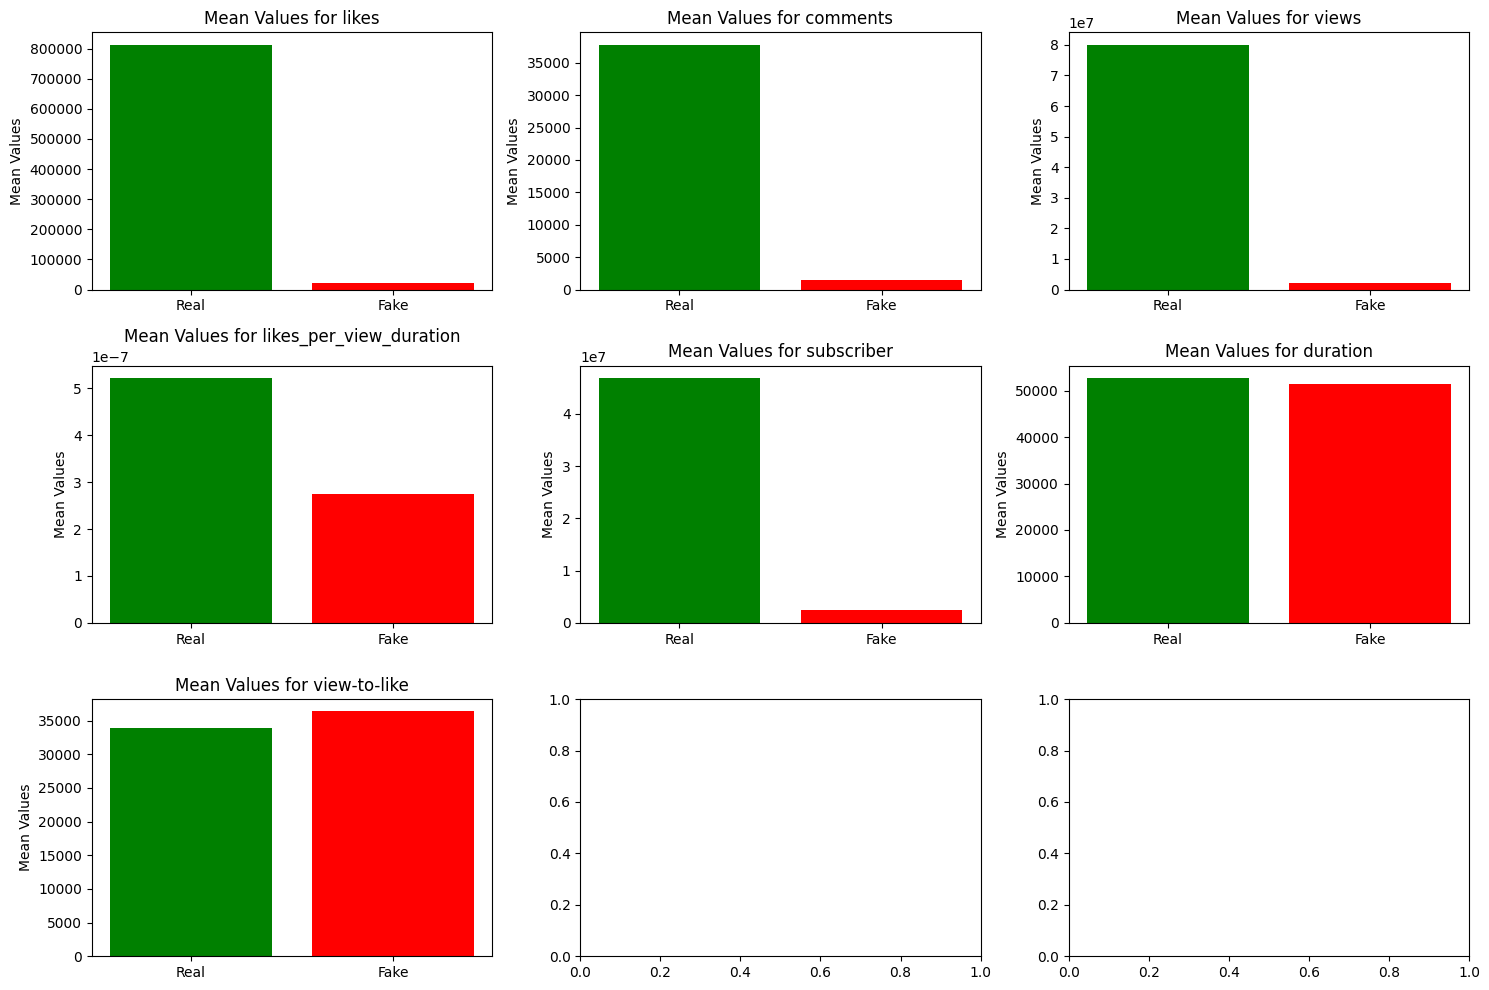

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the specified fields
data = stats
# Calculate mean values for 'REAL' and 'FAKE' labels
real_means = data[data['LABEL'] == 'REAL'][statistics].mean()
fake_means = data[data['LABEL'] == 'FAKE'][statistics].mean()

# Arrange the fields in the desired order
fields = statistics

# Plotting bar graphs for each field separately in a 2x3 subplot format
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, field in enumerate(fields):
    # Plotting bars for REAL labels
    axes[i].bar("Real", real_means[field], color='green')

    # Plotting bars for FAKE labels
    axes[i].bar("Fake", fake_means[field], color='red')

    # Setting labels, title, and legend
    axes[i].set_ylabel('Mean Values')
    axes[i].set_title(f'Mean Values for {field}')

    # Turn off grid
    axes[i].grid(False)

plt.tight_layout()
plt.show()


In [ ]:
final['view-to-like'].describe()

count    1.697000e+03
mean     3.485811e+04
std      7.250173e+05
min      8.121523e+00
25%      4.342837e+01
50%      9.598239e+01
75%      1.784810e+02
max      2.479315e+07
Name: view-to-like, dtype: float64

In [ ]:
# Assuming 'final' is your DataFrame containing the 'view-to-like' and 'views' columns

# Iterate over each row in the DataFrame
for index, row in final.iterrows():
    # Check if the value in the 'view-to-like' column is 'inf'
    if row['view-to-like'] == float('inf'):
        # Replace 'inf' value with the corresponding value from the 'views' column
        final.at[index, 'view-to-like'] = row['views']

# Display the updated DataFrame




# Accuracy Report:

In [ ]:
import pandas as pd

fake_videos = final[final['LABEL'] == 'FAKE']
real_videos = final[final['LABEL'] == 'REAL']

min_samples = min(len(fake_videos), len(real_videos))

undersampled_fake_videos = fake_videos.sample(n=min_samples, random_state=42)

balanced_dataset = pd.concat([undersampled_fake_videos, real_videos], axis=0)

balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)



In [ ]:


attributes_list = [coorelation, comments_emotions,title_emotions , statistics]

categories = ['Coorelation', 'Comments_Emotions','Title_Emotions', 'statistics']

accuracy_scores = {}

# X = balanced_dataset[attributes_list]
# y = balanced_dataset['LABEL']

for i in range(len(categories)):
    selected_attributes = []
    for j in range(i + 1):  # Incrementally add categories
        selected_attributes.extend(attributes_list[j])

    X = final[selected_attributes]
    y = final['LABEL']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores[tuple(categories[:i + 1])] = accuracy

for combination, accuracy in accuracy_scores.items():
    print(f"Categories: {combination}, Accuracy: {accuracy}")




Categories: ('Coorelation',), Accuracy: 0.7411764705882353
Categories: ('Coorelation', 'Comments_Emotions'), Accuracy: 0.788235294117647
Categories: ('Coorelation', 'Comments_Emotions', 'Title_Emotions'), Accuracy: 0.8058823529411765
Categories: ('Coorelation', 'Comments_Emotions', 'Title_Emotions', 'statistics'), Accuracy: 0.9117647058823529


In [ ]:
import plotly.graph_objects as go

# Extract accuracy scores from the accuracy_scores dictionary
accuracy_scores_values = list(accuracy_scores.values())

# Define x values and categories combinations
x_values = list(range(len(accuracy_scores)))
categories_combinations = [' '.join(categories[:i + 1]) for i in range(len(categories))]

# Create a Scatter plot
trace = go.Scatter(x=x_values,
                   y=accuracy_scores_values,
                   mode='lines+markers')

# Define layout
layout = go.Layout(title='Accuracy Score vs Categories Combination',
                   xaxis=dict(title='Categories Combination', tickangle=0, tickmode='array', tickvals=x_values, ticktext=categories_combinations),
                   yaxis=dict(title='Accuracy Score'))

# Create a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()
